# Quick Start - From Python
Here we present a broad overview of using the PyBigDFT library to drive BigDFT calculations using Python. Such overview is intended to provide an initial walkthrough among the basic functionalities of the PyBigDFT objects and API.

The other notebooks of this section will present the main details of each of the functionalities described here.

## Colab Installation
For this tutorial it is enough to install the client version of the BigDFT code.
This means that the actual `bigdft` calculations will not be performed, but emulated (the so called "skip" mode) starting from the data present in the notebook session. Such data come from pre-executed runs and will be downloaded prior to the execution. This would reproduce exctly the same approach for running the actual calculation (`skip=False`)

In [1]:
!pip install -q pybigdft py3dmol
!wget https://gitlab.com/luigigenovese/bigdft-school/-/raw/main/packaging/install.py &> /dev/null
import install
install.data('data/session1.tar.xz')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.5/448.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 5.6 MB/s eta 0:00:00
Executing: wget https://gitlab.com/luigigenovese/bigdft-school/-/raw/main/data/session1.tar.xz -O session1.tar.xz
--2024-01-27 13:47:15--  https://gitlab.com/luigigenovese/bigdft-school/-/raw/main/data/session1.tar.xz
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3298788 (3.1M) [application/octet-stream]
Saving to: ‘session1.tar.xz’

     0K .......... .......... .......... .......... ..........  1% 4.27M 1s
    50K .......... .......... .......... .......... ..........  3% 12.1M 0s
   100K .......... .......... .......... .......... ..........  4% 4.80M 1s
   150K .......... .......... .......... .......... ..........  6% 12.6M 0s
   200K .......... .......... .

The excution of the above cell should take about ten seconds.
Now you can proceed to the execution of the cells below.

## System Manipulation
Here we define a system which is compsed of two fragments: H2 and Helium.

In [2]:
from BigDFT.Systems import System
from BigDFT.Fragments import Fragment
from BigDFT.Atoms import Atom
from BigDFT.Visualization import InlineVisualizer

In [3]:
# Create Three Atoms
at1 = Atom({"r": [0, 0, 0], "sym": "H", "units": "bohr"})
at2 = Atom({"r": [0, 0, 1.4], "sym": "H", "units": "bohr"})
at3 = Atom({"r": [10, 0, 0], "sym": "He", "units": "bohr"})

# Construct a System from Two Fragments (H2, He)
sys = System()
sys["H2:1"] = Fragment([at1, at2])
sys["He:2"] = Fragment([at3])

# Iterate Over The System
for fragid, frag in sys.items():
    for at in frag:
        print(fragid, at.sym, at.get_position())

H2:1 H [0.0, 0.0, 0.0]
H2:1 H [0.0, 0.0, 1.4]
He:2 He [10.0, 0.0, 0.0]


In [4]:
_ = sys.display()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Calculation
Calculate the created system using a grid spacing of $0.4$ and the PBE functional. A logfile is generated from which we can access the computed properties. This logfile has built in properties and can be accessed like a dictionary.

In [5]:
from BigDFT.Inputfiles import Inputfile
inp = Inputfile()
inp.set_hgrid(0.4)
inp.set_xc("PBE")
inp["perf"] = {"calculate_forces": False,
               "multipole_preserving": True}

In [6]:
from BigDFT.Calculators import SystemCalculator
calc = SystemCalculator(skip=True, verbose=False)

In [7]:
log = calc.run(sys=sys, input=inp, name="quick", run_dir="scratch")

In [8]:
print(log.energy)
print(log.log["Memory Consumption Report"]
             ["Memory occupation"])

-4.054615157686378
{'Peak Value (MB)': 230.69, 'for the array': 'f_i', 'in the routine': 'vxcpostprocessing', 'Memory Peak of process': '342.196 MB'}


## Periodic Systems (optional)
The code can treat also extended systems.
We setup a BCC unit cell of iron and perform the calculation using a 2x2x2 k-point grid with a Monkhorst-Pack grid.

In [9]:
from BigDFT.UnitCells import UnitCell

In [10]:
pat = Atom({"Fe": [0, 0, 0], "units": "angstroem"})
psys = System({"CEL:0": Fragment([pat])})
psys.cell = UnitCell([2.867, 2.867, 2.867], units="angstroem")

In [11]:
_ = psys.display()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [12]:
inp = Inputfile()
inp.set_hgrid(0.4)
inp.set_xc("LDA")
inp.set_kpt_mesh(method='mpgrid',ngkpt=[2, 2, 2])

In [13]:
log = calc.run(sys=psys, input=inp, name="psys", run_dir="scratch")

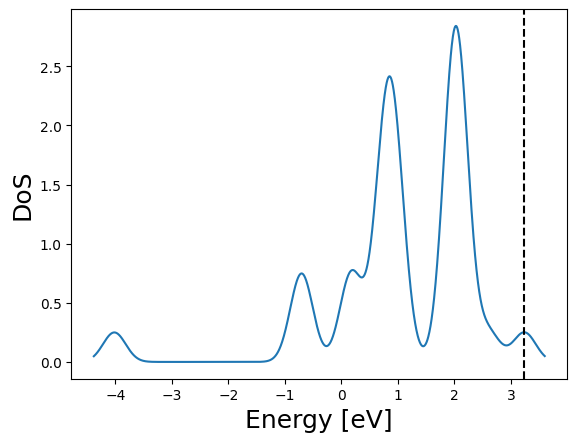

In [14]:
_ = log.get_dos().plot()

## File I/O
Read and write a PDB file. The writing can be done with the `to_file` routine.

In [ ]:
sys.to_file('scratch/temp.pdb')

For the reading, we can use the more pythonic way.
We here read another file.

In [15]:
from BigDFT.IO import read_pdb
with open("scratch/test.pdb", "r") as ifile:
    sys = read_pdb(ifile)

Exercise: in case you feel already confident with the `System` class, can you tell which is the content of thi system? How many fragments are inside?
Hint: `System` inherits for a dictionary (more precisely a `collections.MutableMapping`)